## Linear Regression with sklearn

### 1. Explore preloaded dataset (Boston Housing)

In [1]:
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
type(boston)

sklearn.datasets.base.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
type(boston['data']), type(boston['target'])

(numpy.ndarray, numpy.ndarray)

In [6]:
len(boston['data']), len(boston['target'])

(506, 506)

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [8]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

### 2. Convert boston data and target to pandas DataFrames

In [9]:
import pandas as pd

In [10]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
y = pd.DataFrame(boston['target'], columns=['MEDV'])

In [13]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 3. Visual Exploratory Data Analysis

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

In [15]:
def plot_housing_xy(column_name, xscale='linear'):
    plt.scatter(X[column_name], y['MEDV'])

    plt.xlabel(column_name)
    plt.ylabel('MEDV')

    plt.xscale(xscale)
    plt.show()

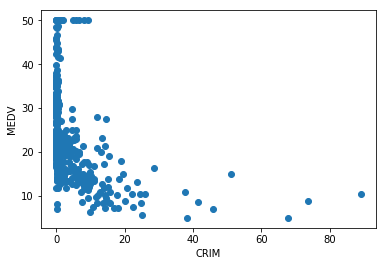

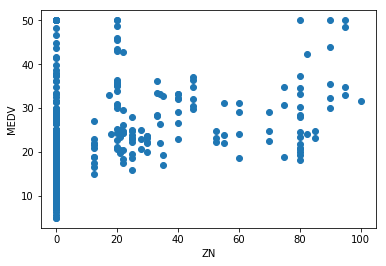

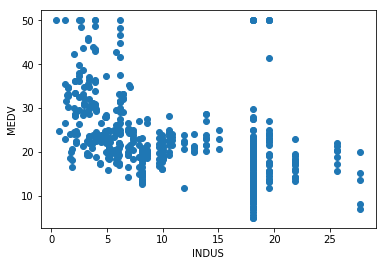

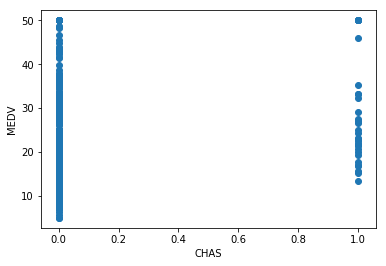

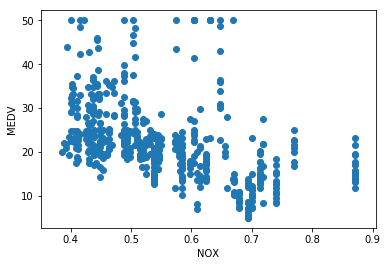

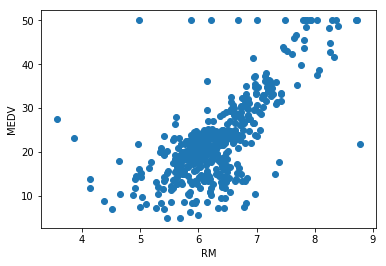

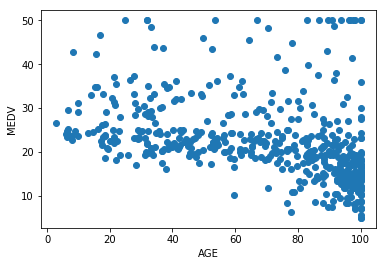

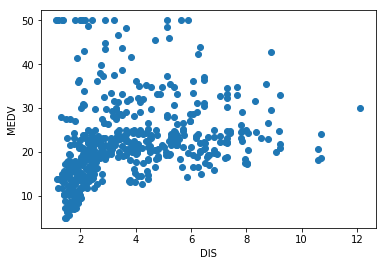

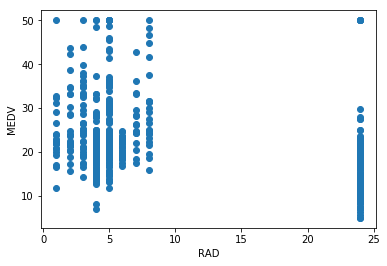

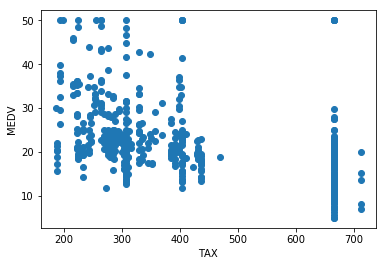

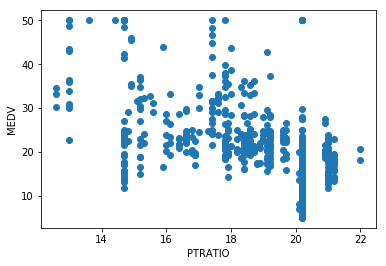

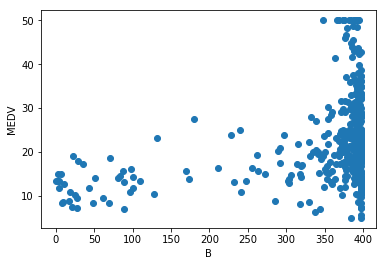

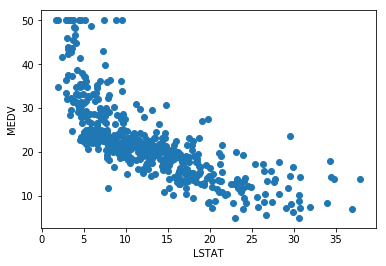

In [16]:
for col_name in X.columns:
    plot_housing_xy(col_name)

### 4. Prediction by single feature (Simple Linear Regression)
#### Feature: RM - average number of rooms per dwelling

In [17]:
X_rooms = boston['data'][:,5]

In [18]:
y = boston['target']

In [19]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [20]:
X_rooms.shape, y.shape

((506,), (506,))

In [21]:
X_rooms = X_rooms.reshape(-1,1)

In [22]:
y = y.reshape(-1,1)

In [23]:
X_rooms.shape, y.shape

((506, 1), (506, 1))

#### Plotting house value vs. avg number or rooms

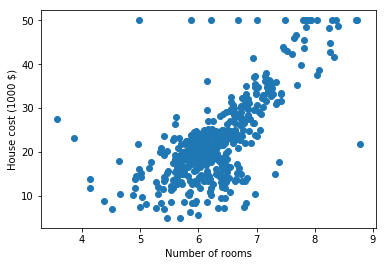

In [24]:
plt.scatter(X_rooms,y)
plt.xlabel('Number of rooms')
plt.ylabel('House cost (1000 $)')
plt.show()

#### Create and fit regression model

In [25]:
from sklearn import linear_model

In [26]:
reg = linear_model.LinearRegression()

In [27]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Show predicted model on the scatter plot of data

In [28]:
import numpy as np

In [29]:
pred_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

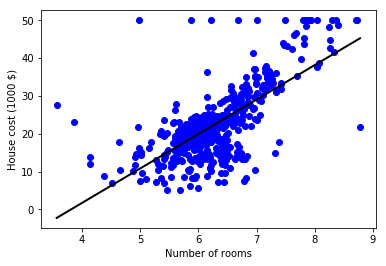

In [30]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(pred_space, reg.predict(pred_space),
        color='black', linewidth=2)

plt.xlabel('Number of rooms')
plt.ylabel('House cost (1000 $)')
plt.show()

#### Split data to get train and test sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_rooms_train, X_rooms_test, y_train, y_test = train_test_split(X_rooms, y, test_size=0.3, random_state=42)

In [33]:
reg = linear_model.LinearRegression()

In [34]:
reg.fit(X_rooms_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_pred = reg.predict(X_rooms_test)

#### Model metric (R-squared)

In [36]:
reg.score(X_rooms_test, y_test)

0.45846499343030678

#### Mean squared error

In [37]:
np.mean((y_pred - y_test)**2)

40.351449697873051

### 5. Predicting on all features (Multiple Linear Regression)

In [38]:
X = boston['data']

In [39]:
y = boston['target']

In [40]:
y = y.reshape(-1,1)

In [41]:
X.shape, y.shape

((506, 13), (506, 1))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
reg_all = linear_model.LinearRegression()

In [44]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
y_pred = reg_all.predict(X_test)

In [46]:
reg_all.score(X_test, y_test)

0.71092035863262715

### 6. Cross-validation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cv_reg = linear_model.LinearRegression()

In [49]:
cv_res = cross_val_score(cv_reg, X, y, cv=5)

In [50]:
cv_res

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

In [51]:
np.mean(cv_res)

0.35074135093251313

In [52]:
cv_res = cross_val_score(cv_reg, X, y, cv=10)

In [53]:
cv_res

array([ 0.73334917,  0.47229799, -1.01097697,  0.64126348,  0.54709821,
        0.73610181,  0.37761817, -0.13026905, -0.78372253,  0.41861839])

In [54]:
np.mean(cv_res)

0.20013786735418701

### 7. Regularized regression

#### OLS - can course overfitting
#### To prevent overfitting - we should use Regularized regression

### 7.1 Ridge regression

In [55]:
from sklearn.linear_model import Ridge

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [57]:
ridge = Ridge(alpha=0.1, normalize=True)

In [58]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [59]:
ridge_pred = ridge.predict(X_test)

In [60]:
ridge.score(X_test, y_test)

0.69955650271004211

#### Much better result!

### 7.2 Lasso regression

In [61]:
from sklearn.linear_model import Lasso

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
lasso = Lasso(alpha=0.1)

In [64]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
lasso_pred = lasso.predict(X_test)

In [66]:
lasso.score(X_test, y_test)

0.69150397743600411

#### Also good result.
#### Lasso regression helps to choose the most important features

In [67]:
lasso = Lasso(alpha=0.1, normalize = True)

In [68]:
names = boston['feature_names']

In [69]:
lasso_coef = lasso.fit(X, y).coef_

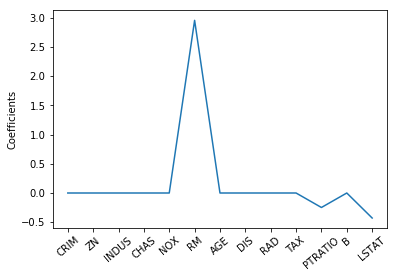

In [70]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=40)
_ = plt.ylabel('Coefficients')
plt.show()

#### RM - average room number is the most important feature